<a href="https://colab.research.google.com/github/yunju-m/AISpeaker/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

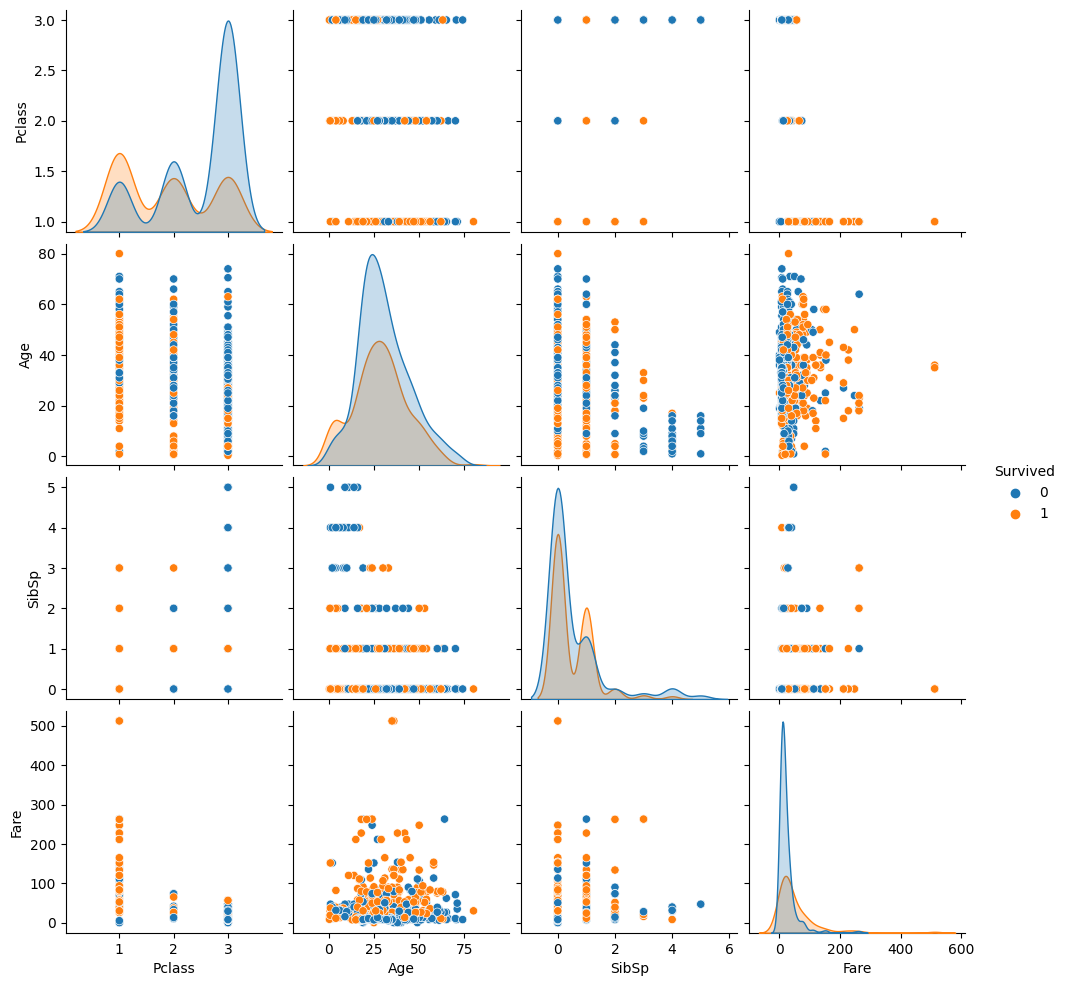

In [ ]:
# Titanic dataset : https://www.kaggle.com/datasets/hesh97/titanicdataset-traincsv?resource=download

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#전체 데이터
print(pd.read_csv('train.csv').shape)
print(pd.read_csv('train.csv').head())

# 그 중 일부 데이터에 대해서만 출력
data = pd.read_csv('train.csv', usecols=['Survived', 'Pclass', 'Age', 'SibSp', 'Fare'])
print(data.shape)
print(data.head())

data = data.dropna()
print(data.shape)

sns.pairplot(data=data, hue='Survived')

In [ ]:
from sklearn.model_selection import train_test_split

X = data.copy()
y = X.pop('Survived')

print(X.shape)
print(X.head())
print(y.shape)
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

print(X_train.shape)
print(X_test.shape)

(714, 4)
   Pclass   Age  SibSp     Fare
0       3  22.0      1   7.2500
1       1  38.0      1  71.2833
2       3  26.0      0   7.9250
3       1  35.0      1  53.1000
4       3  35.0      0   8.0500
(714,)
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
(535, 4)
(179, 4)


Decision Tree를 직접 구현
sklearn.tree.DecisionTreeClassifier 변수 \
criterion : split할 때 쓰는 방법 --> gini 많이 사용 \
splitter : split할 때 어떻게 할 것인지 \
max_depth : 기본값 0 \
min_samples_split : 기본값 2

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## creating decision tree
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

## prediction
predictions = clf_dt.predict(X_test)

 #predictions 변수에 예측된 값들이 모두 들어있는데 10개만 뽑는다.
print(predictions[:10])    
print(accuracy_score(y_test, predictions))   

[0 1 0 0 0 1 1 0 0 1]
0.6424581005586593


sklearn의 ensemble를 이용하여 랜덤 포레스트 구현 \
랜덤 포레스트 : decision tree를 여러개 사용한 것 \
decisionTree의 정확도 65 --> 랜덤포레스트 정확도 70으로 작게나마 상승한 것을 확인할 수 있다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

## prediction
predictions = clf_rf.predict(X_test)
print(predictions[:10])
print(accuracy_score(y_test, predictions))

# array형태로 feature값이 들어온다.
# 큰 값일수록 feature가 중요하다. 
# 즉 가장 큰 4번째인 Fare가 가장 중요하고 두 번째로 큰 Age가 중요한 것을 알 수 있다.
importances = clf_rf.feature_importances_   
print(importances)

[0 1 0 0 0 0 0 0 0 1]
0.7039106145251397
[0.12560281 0.3996302  0.06024995 0.41451704]


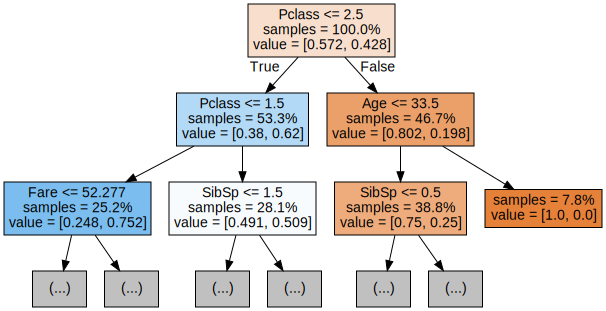

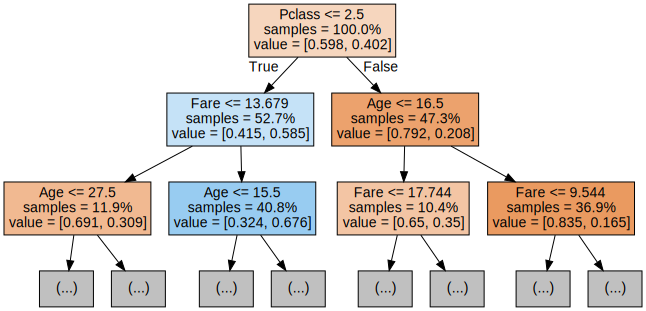

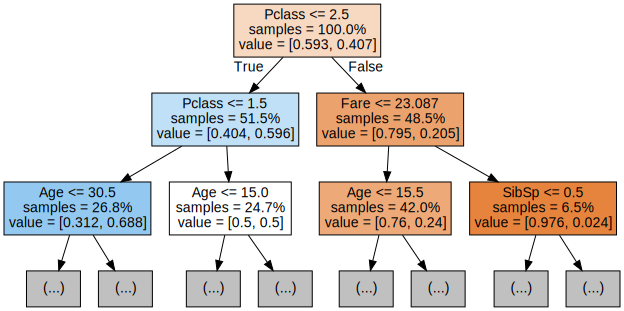

In [ ]:
## Export the first three decision trees from the forest
## Tree visualization

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(3):
    tree = clf_rf.estimators_[i]
    dot_data = export_graphviz(tree, feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)


이번에는 mnist를 이용하여 구해본다.
mnist 데이터를 불러온다. 
x, y test가 10000으로 동일한 것을 확인할 수 있다.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
X_train = X_train.astype(np.float32)
y_test = y_test.astype(np.float32)

## 28 x 28 --> flatten
num_features = 28*28

X_train = X_train.reshape([-1, num_features])
X_test = X_test.reshape([-1, num_features])

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


[7 2 1 0 4 1 4 9 5 9]
0.9683


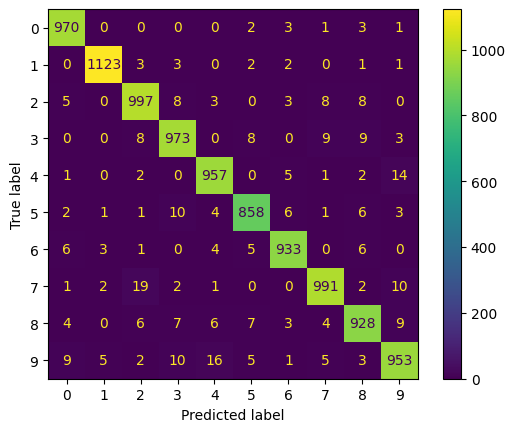

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

## prediction by randomforest
predictions = clf_rf.predict(X_test)
print(predictions[:10])
print(accuracy_score(y_test, predictions))

cm = confusion_matrix(y_test, predictions, labels=clf_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_rf.classes_)
disp.plot()
plt.show()

In [ ]:
## prediction by MLP
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from tqdm import tqdm, trange

batch_size = 64

X_train_torch = torch.from_numpy(X_train).float()
y_train_torch = torch.from_numpy(y_train)
train_dataset = TensorDataset(X_train_torch, y_train_torch)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

X_test_torch = torch.from_numpy(X_test).float()
y_test_torch = torch.from_numpy(y_test)
test_dataset = TensorDataset(X_test_torch, y_test_torch)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

# torch가 제대로 만들어졌는지 확인
print(X_train_torch.size())

# pytorch로 구현된 모델을 매개변수로 주면 그 모델로 MNIST 학습을 진행하는 함수입니다.
def train(model):
  for epoch in range(10): # epoch : 10개로 지정
    model.train()
    for data, target in train_loader:
      optimizer.zero_grad()
      y_pred = model(data)
      loss = criterion(y_pred, target)
      loss.backward()
      optimizer.step()

    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for data, target in test_loader:
            y_pred = model(data)
            _, predicted = torch.max(y_pred.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
        
        accuracy = 100. * correct / total
        print('Epoch: {}, Test Accuracy: {:.2f}%'.format(epoch+1, accuracy))


# 기존의 방법으로 MLP를 구현한 코드입니다.
# 빌딩 블록의 구성요소들을 모두 변수로 할당해주고
# forward 함수에서 엮어줘야 하는 불편함이 있었습니다.
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten() 
    self.fc1 = nn.Linear(784, 250)
    self.fc2 = nn.Linear(250, 100)
    self.fc3 = nn.Linear(100, 10)
    self.activation = nn.ReLU()

  def forward(self, x):
    x = self.flatten(x)
    x = self.activation(self.fc1(x))
    x = self.activation(self.fc2(x))
    x = self.fc3(x)
    return x

model = MLP()
print(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
train(model)



torch.Size([60000, 784])
MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=250, bias=True)
  (fc2): Linear(in_features=250, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
  (activation): ReLU()
)
Epoch: 1, Test Accuracy: 93.36%
Epoch: 2, Test Accuracy: 94.45%
Epoch: 3, Test Accuracy: 95.43%
Epoch: 4, Test Accuracy: 95.77%
Epoch: 5, Test Accuracy: 96.28%
Epoch: 6, Test Accuracy: 96.32%
Epoch: 7, Test Accuracy: 96.62%
Epoch: 8, Test Accuracy: 96.60%
Epoch: 9, Test Accuracy: 96.65%
Epoch: 10, Test Accuracy: 96.87%
